<a href="https://colab.research.google.com/github/Emmanuel-Favour/Intro-to-Machine-Learning/blob/main/Spam_Filter_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# My First Machine Learning Algorithm

* About the project: The dataset of about 5574 rows and 2 columns being used in the project was forked from a github repository. The dataset consist of spam dataset and the project involves the use of supervised machine learning model (Naive Bayes  Models i.e (GausianNB, BernouliNB, MultinomialNB)).
* The above solution is a classification model, which helps to predict incoming emails on a device to be either Spam or not.


#### Loading libraries

In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

#### Data Gathering

In [ ]:
#loading dataset
email_df = pd.read_csv("email.csv", encoding='latin1')

In [ ]:
email_df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...
5570,ham,Will ü b going to esplanade fr home?
5571,ham,"Pity, * was in mood for that. So...any other s..."
5572,ham,The guy did some bitching but I acted like i'd...


#### Data Assessment

In [ ]:
#using the describe funtion to get statistical summary of the dataset.
email_df.describe()

,Category,Message
count,5574,5572
unique,2,5156
top,ham,"Sorry, I'll call later"
freq,4827,30


In [ ]:
#using the describe function to get statistical summary of the category column of the dataset.
email_df.groupby("Category").describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    640  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [ ]:
#Using the info() function to the an overview of the dataset.
email_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5574 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
#Using the isnull and sum function to get the sum of all null values.
email_df.isnull().sum().sum()

2

In [ ]:
#Using the loc function to slice the dataset for index of the null values.
display(email_df.loc[(email_df["Message"].isnull() )])

,Category,Message
5082,ham,NaN
5083,ham,NaN


In [ ]:
#getting a list of the null value index with the
email_df[email_df["Message"].isnull()].index.tolist()

[5082, 5083]

#### Data cleaning

In [ ]:
#Replacing null values with random email texts.
email_df.loc[5082, "Message"] = "Please find attached to this email the copies of the document you requested for"
email_df.loc[5083, 'Message'] = "This is to let you know that PTCCentre is going live on Mixlr right now. Listen live now."

In [ ]:
#Confirming if the list of null has been replaced.
email_df[email_df["Message"].isnull()].index.tolist()

[]

In [ ]:
#Creating a new column
email_df["variable"] = email_df["Category"].apply(lambda x: 1 if x=="spam" else 0)

In [ ]:
cv = CountVectorizer()
email_df_count = cv.fit_transform(email_df.Message)
email_df_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
#Create train/split function
x_train, x_test, y_train, y_test = train_test_split(email_df_count, email_df.variable, test_size = 0.25)

In [ ]:
#training the multinomial model
multi = MultinomialNB()
multi.fit(x_train, y_train)

MultinomialNB()

In [ ]:
#training the bernoulli model
BernNB = BernoulliNB()
BernNB.fit(x_train, y_train)

BernoulliNB()

In [ ]:
#training the Gaussian model
Gauss= GaussianNB()
x_train_dense = x_train.toarray()
Gauss.fit(x_train_dense, y_train)

GaussianNB()

In [ ]:
#Training the KNN Model
KNN = KNeighborsClassifier(n_neighbors=1)
KNN.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

### Evaluating Model Performance.
* Accuracy Test

In [ ]:
#Testing Multinomial model Accuracy
pred1 = multi.predict(x_test)
print(accuracy_score(pred1, y_test, normalize=True))

0.9813486370157819


In [ ]:
#Testing Bernouli model Accuracy
pred2 = BernNB.predict(x_test)
print(accuracy_score(pred2, y_test, normalize=True))

0.9720229555236729


In [ ]:
#Testing KNN model Accuracy
pred3 = KNN.predict(x_test)
print(accuracy_score(pred3, y_test, normalize=True))

0.9375896700143472


In [ ]:
#Getting the test and train accuracy values for neighbor range 1-25
train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1,26)
for neighbor in neighbors:
    Knn = KNeighborsClassifier(n_neighbors = neighbor)
    prd = Knn.fit(x_train, y_train)
    train_accuracies[neighbor] = Knn.score(x_train, y_train)
    test_accuracies[neighbor] = Knn.score(x_test, y_test)



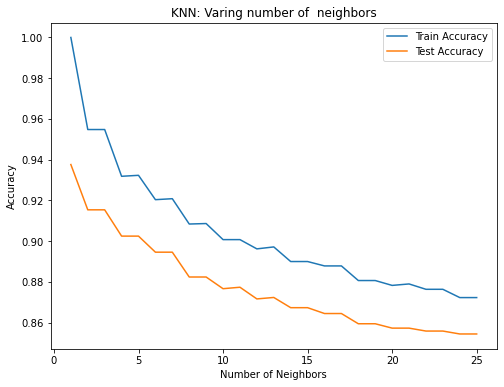

In [ ]:
#Ploting the training and text accuracy values for neighbor range 1-25
plt.figure(figsize=(8,6))
plt.title("KNN: Varing number of  neighbors")
plt.plot(neighbors, train_accuracies.values(), label="Train Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Test Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

In [ ]:

x_test_dense = x_test.toarray()
pred4 = Gauss.predict(x_test_dense)
print(accuracy_score(pred4, y_test, normalize=True))

0.9081779053084649


#### Summary
* From the Model Performance by accuracy, the Multinomial model predicted better with an accuracy of 0.98 and very close to it was Bernoulli with a prediction accuracy 0.97 score
* KNN and GaussianNB were a bit far from the mark even after a bit of hyper-parameter tuning with the KNN models, it still appears that the highest accuracy is at a n_neighbor = 1 which is still not good enough.